# Lab 5 Solutions

If imaging data is the 'bread and butter' of astronomy (see Lab 2), then spectrosopy is meat and potatoes.    

In this lab, we will guide you through reading, plotting and fitting spectra of stars in a Milky Way globular cluster.  The science goal is to determine the velocity and velocity errors for a handful of stars in order to determine if they are members of the globular cluster, or foreground stars in the Milky Way.    The coding goal is to apply both $\chi^2$ fitting and MCMC fitting techniques when the model is more complicated.


### Goals of this lab:

1. Explore a maintained software package (pypeit).
2. Read a complicated fits file and plot a spectrum. 
3. Find parameters and errors via chi2 fitting when the model is not an analytic function
4. Find parameters and errors via MCMC.
5. Fitting polynomials to 2D surfaces, corner plots


### Question 1:   Keck DEIMOS data

We will be working with data from the Keck Telescope's DEIMOS instrument.   All Keck data is publically available on the Keck Data Archive (KOA) website.   While we will not be directly reducing the raw data, let's take a look at these files to get a sense for what the data look like.   We've selected data from the Milky Way globular cluster NGC 7006. 

Head to the KOA website (https://koa.ipac.caltech.edu/cgi-bin/KOA/nph-KOAlogin) and search for all files take with DEIMOS on the night of June 3, 2011 (20110603).   Search the list for files with `Target Name == n7006` and `Image or Dispersion == mos`.    Find the column named `Quicklook Previews` and click on `[Raw]`.   This is a single exposure of a spectroscopic mask centered on NGC 7006.   You should see a hundred or so spectra in this image.   

We can see below the file image has multiple spectra (horizontal) in small sections of the detector (vertically). The vertical lines are skylines, present at certain wavelengths across the width of the slit. Notice that the tilt of these lines also varies across the detector... another challenge for reduction.

<img src="DE.20110603.45055.jpg" width="500" height="400">

### Question 2:  Spectral Reductions with PypeIt

Using the raw files downloaded from the KOA above , we [the A330 instructors] have run the science and calibration frames through a spectral reduction softare package called `PypeIt`:  https://pypeit.readthedocs.io/en/release/.  The `PypeIt` github repository can be found here:  https://github.com/pypeit/PypeIt

While we won't actually run `PypeIt` in this lab, we will be using its output files.   This is a software project that is actively being developed, so let's look around at the code and identify some familar pieces:

On github, take a look in the /pypeit directory and click on a few of the *.py files.  
   1.  Find one instance of PypeIt using a Class structure  
   2.  Find one instance of PypeIt not fully/properly populating a doc string :)
   3.  Find a line of code that you understand and explain what its doing
   4.  Fine a line of code that you don't understand.
   5.  How many branches current exist from the main `release` branch?


### Answers to 5 items above.

   1.  Find one instance of PypeIt using a Class structure  
   2.  Find one instance of PypeIt not fully/properly populating a doc string :)
   3.  Find a line of code that you understand and explain what its doing
   4.  Fine a line of code that you don't understand.
   
   5.  How many branches current exist from the main `release` branch?
       > As of 10/4/2021, I counted 31 branches of pypeit.

In the data access directory, we have provide a PypeIt output file which contains one-dimensional spectra for all the stars observed in the DEIMOS mask `n7006a` that you viewed above.   Read in the file using the astropy.io.fits commands and view the contents using `hdu.info()`.   State how many spectra are contained in this file.

In [9]:
from astropy.io import fits
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

file = 'spec1d_DE.20110603.45055-n7006a_DEIMOS_2011Jun03T123053.021.fits'

In [49]:
# Code to view file contents
hdu = fits.open(file)
hdu.info()

Filename: spec1d_DE.20110603.45055-n7006a_DEIMOS_2011Jun03T123053.021.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     231   ()      
  1  SPAT0494-SLIT0507-DET01    1 BinTableHDU     83   4096R x 22C   [1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1K]   
  2  SPAT0589-SLIT0577-DET01    1 BinTableHDU     83   4096R x 22C   [1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1K]   
  3  SPAT0642-SLIT0717-DET01    1 BinTableHDU     83   4096R x 22C   [1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1K]   
  4  SPAT0716-SLIT0717-DET01    1 BinTableHDU     83   4096R x 22C   [1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1K]   
  5  SPAT1002-SLIT0946-DET01    1 BinTableHDU     83   4096R x 22C   [1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1K]   
  6  SP

### How many spectra are contained in this file?

There are 191 individual spectra in this fits file.

### Question 3: Plotting 1D PypeIt output spectra and fitting by eye

We have selected 3 spectra from this file which are high signal-to-noise stars.   From your fits table that you have read in, select extension 121, 135 and 157.   These can also be selected using the names 'SPAT0564-SLIT0560-DET06', 'SPAT1163-SLIT1162-DET06' and 'SPAT0288-SLIT0302-DET07'.   Save the data for each spectrum separately.

Plot wavelength versus counts/flux for each star.   Please use the optimal extraction results ('OPT_*').  If you need additional guidence for what is in this file, see the PypeIt documentation on spec1d_* files:  https://pypeit.readthedocs.io/en/release/out_spec1D.html

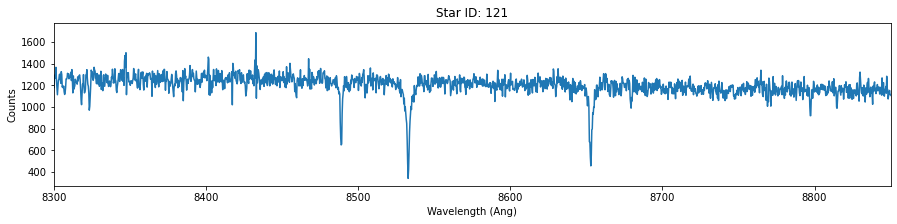

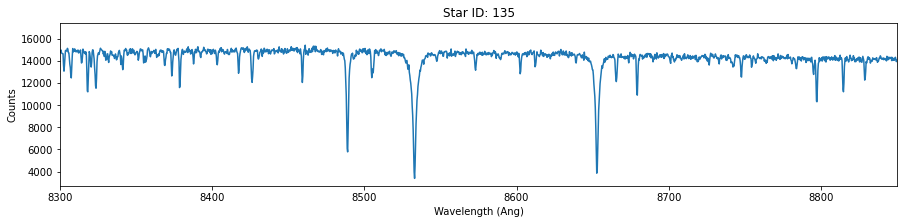

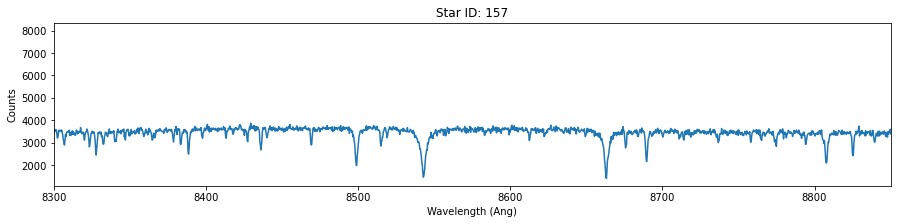

In [23]:
# For each of these three stars, plot the wavelength versus counts.  Use ylim =  8300-8800 Angstrum

star_id = [121,  135,  157]

for id in star_id:
    
    fig,ax = plt.subplots(figsize=(15,3))
    data = hdu[id].data

    plt.plot(data['OPT_WAVE'],data['OPT_COUNTS'])
    plt.title('Star ID: {}'.format(id))
    plt.xlim(8300,8850)
    plt.xlabel('Wavelength (Ang)')
    plt.ylabel('Counts')

### Extra (+0.5)   
To get a sense for the velocity of each star, you might try measuring a rough velocity 'by eye'.   The three strongest lines in the spectra above are from Calcium II:  8500.36, 8544.44, 8664.52 Angstrum. What velocity do you estimate?   

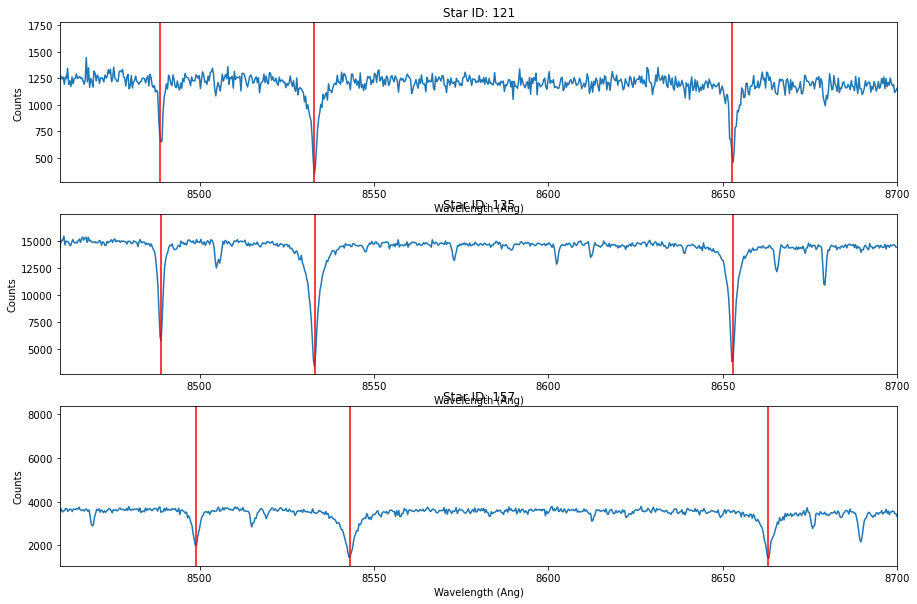

In [24]:
fig, axs = plt.subplots(3, 1,figsize=(15,10))

# ROUGHLY GUESS VELOCITY (km/s) -- DONE HERE BY EYE
v_guess  = [-410,-400,-50]

ca_lines = [ 8500.36, 8544.44, 8664.52]

for id,v,ax in zip(star_id, v_guess, axs):
    data = hdu[id].data

    ax.plot(data['OPT_WAVE'],data['OPT_COUNTS'])
    ax.set_title('Star ID: {}'.format(id))
    ax.set_xlim(8460,8700)
    ax.set_xlabel('Wavelength (Ang)')
    ax.set_ylabel('Counts')
    
    for cl in ca_lines:
        ca_guess = cl * (1.+ v/2.99e5)
        ax.axvline(ca_guess,c='r')

So we now know the velocities we are going to fit for (for the three stars) are roughly in the range of -410, -400, and -50 km/s, respectively.

### Question 4: Synthetic model spectra 

In ASTR 255 and the extra question above, you have measured the velocity of a star by measuring the center of a known absorption line (either by eye or fitting a Gaussian) and comparing to its rest wavelength.   While this process does estimate the star's velocity, it wastes much of the information present in the full spectrum.  To determine more accurate velocities, we turn to "template fitting" where a spectrum with a known velocity is compared to our unknown science spectrum.    A template spectrum can either be empiricial (an observed spectrum of a standard star where the velocity is already known) or synthetic (numerically computed from stellar models).   Here we will use synthetic templates from the PHEONIX library:  https://phoenix.astro.physik.uni-goettingen.de/

In [25]:
template_file = 'dmost_lte_5000_3.0_-2.0_.fits'

In [26]:
def read_synthetic_spectrum(pfile):
    '''
    Function to load synthetic template file into python using vacuum wavelengths
    
    Parameters
    ----------
    pfile: str
        path to the synthitic fits file to load. 
        
    Returns
    -------
    pwave: float array
        Wavelengths of synthetic spectrum
    pflux: float array
        Flux of sythetic spectrum
    '''

    with fits.open(pfile) as hdu:
        data     = hdu[1].data
        
    pflux = np.array(data['flux']).flatten()
    awave = np.exp((data['wave']).flatten())
    

    # CONVERTING AIR WAVELENGTHS TO VACUUM
    s = 10**4 / awave
    n = 1. + 0.00008336624212083 + \
            (0.02408926869968 / (130.1065924522 - s**2)) +\
            (0.0001599740894897 / (38.92568793293 - s**2))

    pwave  = awave*n
    
    return pwave, pflux

Text(0, 0.5, 'Flux')

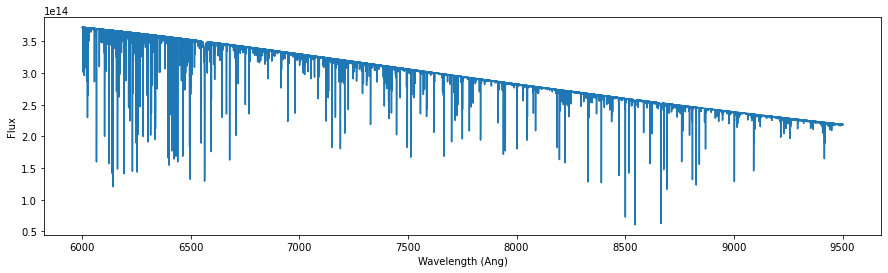

In [27]:
# Read in synthetic spectra and plot wavelegth versus flux
pwave, pflux = read_synthetic_spectrum(template_file)

fig,ax = plt.subplots(figsize=(15,4))
plt.plot(pwave,pflux)
plt.xlabel('Wavelength (Ang)')
plt.ylabel('Flux')

### Question 5: Synthetic model spectra -- Smoothing and Continuum fitting

We will fit the sythetic spectrum to our science data with the goal of determining the velocity of our science spectrum.   The synthetic spectrum is at zero velocity.   To match the science data, we will need to (1) smooth the synthetic spectrum to the wavelength resolution of the science, (2) shift the sythetic spectrum to the velocity of the science data, and (3) rebin the synthetic spectrum and match continuum levels.

#### Smoothing the templates 

We will first address how to smooth the synthetic spectrum to match the data.   We will fit for this value below, but for the moment, let's just choose a number based on a single point estimate. The DEIMOS spectral lines are well fit by a Gaussian with a 1-$\sigma$ line width that is roughly 0.5 Angstrum.   The synthetic spectra have resolution of 0.02 Angstrum.   Thus, we need to smooth the sythetic spectra with a Gaussian kernal that is 0.5/0.02 = 25 pixels.   

Hint: scipy has functions which do Gaussian filtering in 1D.

In [28]:
# Write a function to Gaussin smooth the synthtic spectrum, using a smoothing kernal of 25 pixels.

import scipy.ndimage as scipynd

def smooth_spectrum(flux, lsf):
    '''
    Smooth input spectrum using a Gaussian kernal
    
    Parameters
    ----------
    flux: float array
        path to the synthitic fits file to load. 
    lsf: float
        Line Spread Function.  LSF is used as the width of the Gaussian smoothing kernal
       
    Returns
    -------
    smoothed_flux: float array
        Smoothed input array
    '''
    
    smoothed_flux = scipynd.gaussian_filter1d(flux,lsf,truncate=3)
    return smoothed_flux

#### Fitting the Continuum

We will next address the above step (3), the overall shape and value of the spectrum which we will call the 'continuum'.   Let's fit a function to the synthetic spectrum so that it is approximately the same as the science spectrum. For the section of a spectrum we are working with a **linear function** (i.e., like we fit in lab 4) is sufficient. To do this, we will first rebin the synthetic spectrum in wavelength to the same array as the data. 

Choose a science spectrum from above and rebin the sythentic template so that it uses the same wavelength array (consider using `np.interp()`). We need this to carry out point by point fits and comparisons between arrays. 

Next, determine the **linear function** (mx+b) needed to match the continuum of the synthetic spectrum to that of the science. The actual "thing" we want to fit with a line is the *response function*, the division between the science spectrum and the synthetic spectrum. So when you rebin your synthetic spectrum to the wavelengths of the data, you'll then divide, and fit the resulting relation. The coefficients of this line will tell you how to multiply the synthetic spectrum (which has units very different than the data) to get the continua to line up roughly.

In [29]:
# Write a function to rebin the synthetic template to the data wavelength array and fit the continuuum.
def fit_continuum(pwave,pflux,data_wave,data_flux):
    '''
    Function to load synthetic template file into python using vacuum wavelengths
    
    Parameters
    ----------
    pfile: str
        path to the synthitic fits file to load. 
        
    Returns
    -------
    pwave: float array
        Wavelengths of synthetic spectrum
    pflux: float array
        Flux of sythetic spectrum
    '''
        
    new_templ = np.interp(data_wave,pwave,pflux) #rebin synthetic to data
    
    # CREATE A MASK TO REJECT LOWEST AND HIGHEST PIXELS
    tmp = data_flux/new_templ #this is the response function
    msk = (tmp > np.percentile(tmp,20)) & (tmp < np.percentile(tmp,99)) # don't fit the outermost outlying points 
    
    
    p  = np.polyfit(data_wave[msk],data_flux[msk]/new_templ[msk],1) #fit 
    pfit = np.poly1d(p)
    model = new_templ * pfit(data_wave)
    
    return model

In the above solution, we used `np.percentile` to make a mask so that the deepest absorption lines didn't strongly affect the fit. Another way to do this is with an *iteratve polyfit*, which performs several iterations of fitting and sigma-clipping. We provide an example of an interative polyfit function below, which you could use within your fit continuum function.

In [ ]:
def iterative_polyfit(x,y,order=1,iterations=10,k_clip=3):
    x_to_fit = np.copy(x)
    y_to_fit = np.copy(y)
    for i in range(iterations):
        #fit the data 
        fit = np.polyfit(x_to_fit,y_to_fit,order)
        yfit = np.polyval(fit,x_to_fit)
        #find residuals
        residuals = y_to_fit - yfit
        sigma_residuals = np.std(residuals)
        #identify outliers
        subsample = np.where(np.abs(residuals)<k_clip*sigma_residuals)[0]
        #print('{} Points removed'.format(removed))
        #Set fitting data to be the things that had lower residuals than 3-sigma
        x_to_fit = x_to_fit[subsample]
        y_to_fit = y_to_fit[subsample]

    return fit #From the final iteration 

OK, now run both functions (your smoothing function and your rebin/continuum function) on the sythetic spectrum and plot the results.  

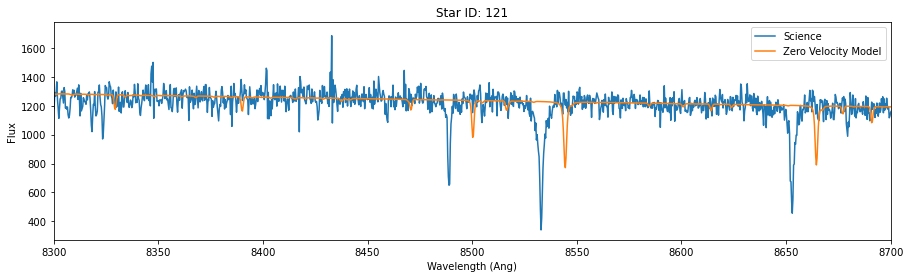

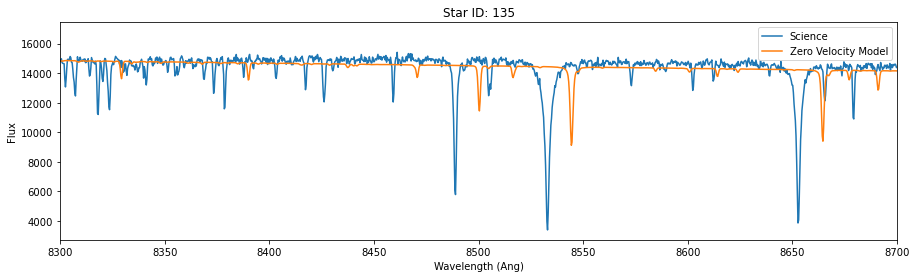

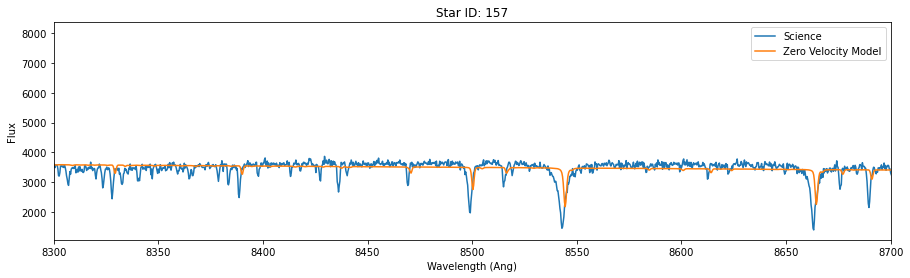

In [106]:
# Run both functions (smooth + rebin/continumm) and plot your smoothed, continuum normalized synthetic spectrum
# Compare this to one of your science spectra.

for id in star_id:
    
    data = hdu[id].data

    lsf = 25
    synthetic_smooth  = smooth_spectrum(pflux, lsf)
    model    = fit_continuum(pwave, synthetic_smooth, data['OPT_WAVE'], data['OPT_COUNTS'])
    
    fig,ax = plt.subplots(figsize=(15,4))

    ax.plot(data['OPT_WAVE'], data['OPT_COUNTS'],label = 'Science')
    ax.plot(data['OPT_WAVE'], model, label='Zero Velocity Model')

    ax.set_xlabel('Wavelength (Ang)')
    ax.set_ylabel('Flux')
    ax.set_title('Star ID: {}'.format(id))

    ax.set_xlim(8300,8700)
    plt.legend()

So, the models above fit the science data, except for an unknown velocity shift.

```{note}
Because we are using a single template, it fits some of the stars (like absorption line depth/width) better than others. In reality, we would choose temmplates for each start that would better match. But as it turns out, even though the "best fit" here won't be good in the "absolute" sense (except for one of the three stars), it will still (mostly) correctly identify the right shift. Put another way, the final shift may not be a great fit, but it will be the best one when we perform a grid search or mcmc.
```

### Extra (1.0) 
When fitting continua, we usually want to avoid the "features" in the spectrum. We could mask them out, or drop percentiles of the data far from the median... but we could also iteratively remove them. To do this, you would fit your chosen function to the data as a start, then iterate, throwing out 3 (or 5 or whatever works) sigma distant points and re-fitting. This works because emission and absorption lines have data points far from the continuum value. Try fitting your continuum this way to get a better estimate. 

See the script above `fit_continuum` where I have masked out the bottom 20% and top 1% of fluxes, or the iterative polyfit provided.

### Question 6: $\chi^2$ fitting to find velocity

The science and synthetic spectra above should roughly match-- except for an unknown velocity shift.   You can shift the synthetic template in velocity by changing its wavelength array *before smoothing*.  Recall that $\delta \lambda = \lambda * v/c$.   

Write a $\chi^2$ code to find the best-fit velocity for each of the three stars above.   Look up the velocity of the globular cluster NGC 7006 to justify the range of velocities to search over.   Consider the wavelength resolution of your science data to determine the spacing of your grid.

In [124]:
def calc_chi2(flux, model, ivar):
    '''
    Function to calculate chi2
    '''
    
    chi2 = np.sum(ivar * (flux-model)**2)
    
    return chi2

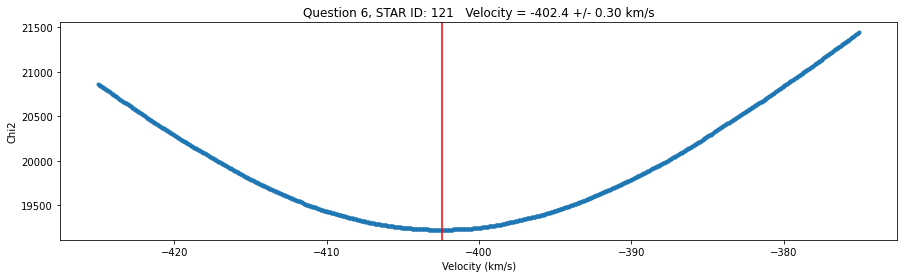

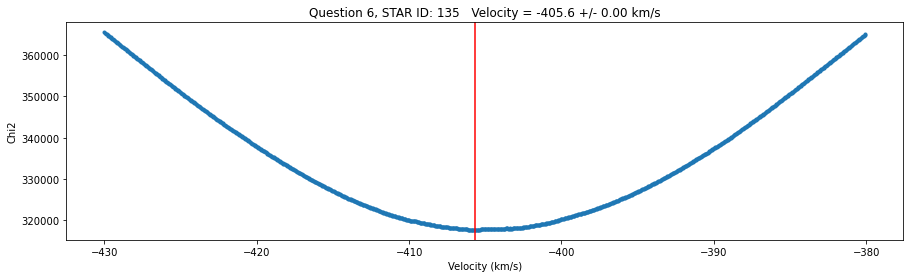

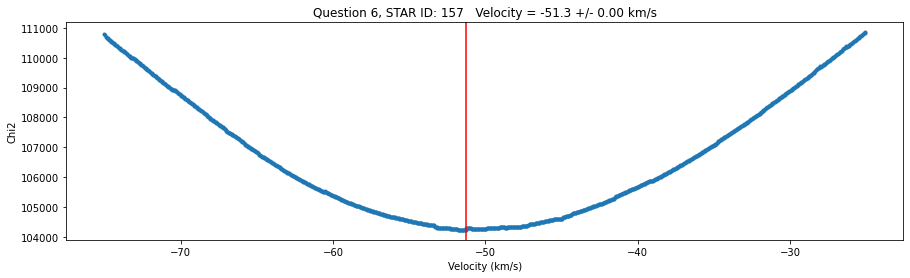

In [126]:
# Write a chi2 algorithm to determine the best fitting velocity and error.

v_guess  = [-400,-405,-50]    # Guesses from above
lsf = 25

for id,vg in zip(star_id,v_guess):
    
    # SET DATA SPECTRUM AND INITIALIZE VELOCITY GRID
    data = hdu[id].data
    v_grid = np.arange(-25,25,0.05) + vg 

    chi2_grid = []
    for v in v_grid:
        
        # SHIFT SYNTHETIC WAVELENGTH 
        shifted_wave =   pwave * (1 + v/2.997924e5)     

        # SMOOTH TEMPLATE
        synthetic_smooth = smooth_spectrum(pflux, lsf)
        
        # MATCH CONTINUUM
        model            = fit_continuum(shifted_wave, synthetic_smooth, data['OPT_WAVE'], data['OPT_COUNTS'])
        
        # CALCULATE CHI2 AND APPEND
        c = calc_chi2(data['OPT_COUNTS'], model, data['OPT_COUNTS_IVAR'])
        chi2_grid = np.append(chi2_grid,c)
        
        
 
    # FIND BEST VALUE
    idx_min = np.argmin(chi2_grid)
    
    # FIND ERROR
    msk = chi2_grid < (np.min(chi2_grid) + 1.)
    v_err = (np.max(v_grid[msk]) - np.min(v_grid[msk]))/2.

    str = 'Question 6, STAR ID: {}   Velocity = {:0.1f} +/- {:0.2f} km/s'.format(id, v_grid[idx_min],v_err)
    
    fig,ax = plt.subplots(figsize=(15,4))
    plt.plot(v_grid,chi2_grid,'.')
    plt.xlabel('Velocity (km/s)')
    plt.ylabel('Chi2')    
    plt.title(str)
    plt.axvline(v_grid[idx_min],color='r')
    

### Question 7:  $\chi^2$ fitting with more parameters

In Question 6, we fixed the smoothing value to 25 pixels and used a single function to match the sythentic to science continuum.   Next, let's redo $\chi^2$, but now including these values in the fit.   This will be a 2 parameter chi2 fit. 

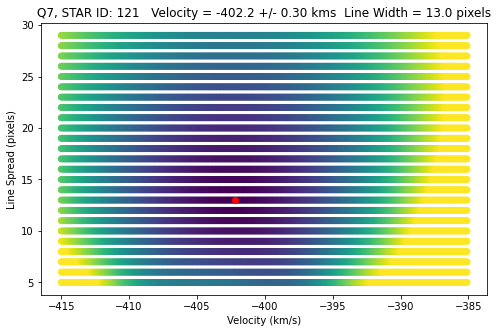

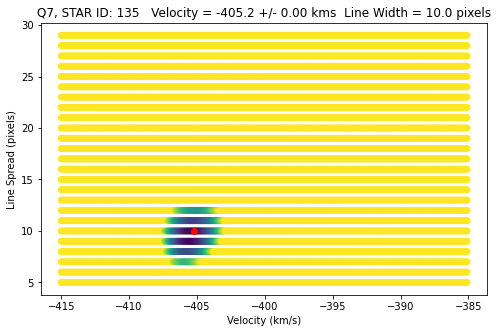

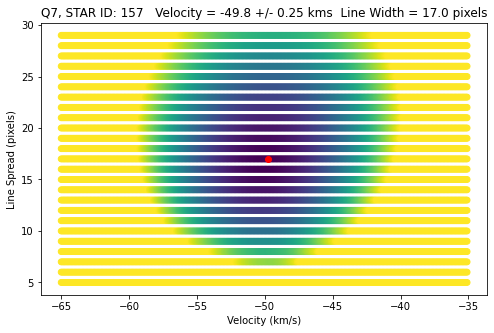

In [129]:
# Repeat $chi^2$ fitting searching over 2 (and bonus 4) parameters: 
#             velocity, smoothing, and (bonus) continuum value (m,b)
# If you use 4 parameters, this will get ugly.  
#
# Calculate errors from your chi2 contours on the velocity only.

v_guess  = [-400,-400,-50]
lsf_grid = np.arange(5,30,1)

for id,vg in zip(star_id,v_guess):
    
    # SET DATA SPECTRUM AND INITIALIZE VELOCITY GRID
    data = hdu[id].data
    wmask = (data['OPT_WAVE'] > 8300) & (data['OPT_WAVE'] < 8700)

    v_grid = np.arange(-15,15,0.1) + vg 

    # DOUBLE FOR LOOP, HERE WE COME!
    chi2_grid, v_arr, lsf_arr = [],[],[]
    for v in v_grid:
        for lsf in lsf_grid:

            # SHIFT SYNTHETIC WAVELENGTH 
            shifted_wave =   pwave * (1 + v/2.997924e5)     

            # SMOOTH TEMPLATE
            synthetic_smooth = smooth_spectrum(pflux, lsf)

            # MATCH CONTINUUM
            model            = fit_continuum(shifted_wave, synthetic_smooth,\
                                             data['OPT_WAVE'][wmask], data['OPT_COUNTS'][wmask])

            # CALCULATE CHI2 AND APPEND
            c = calc_chi2(data['OPT_COUNTS'][wmask], model, data['OPT_COUNTS_IVAR'][wmask])
            chi2_grid = np.append(chi2_grid,c)
            v_arr   = np.append(v_arr,v)
            lsf_arr = np.append(lsf_arr,lsf)
        
    # PLOT CHI2 RESULTS
    fig, ax = plt.subplots(figsize=(8,5))
    idx_min = np.argmin(chi2_grid)
    
    # FIND ERROR
    msk = chi2_grid < (np.min(chi2_grid) + 1.)
    v_err = (np.max(v_arr[msk]) - np.min(v_arr[msk]))/2.

    plt.scatter(v_arr,lsf_arr,c=chi2_grid,marker='o',s=35,\
            vmin=chi2_grid[idx_min],vmax =chi2_grid[idx_min]+1000)

    str = 'Q7, STAR ID: {}   Velocity = {:0.1f} +/- {:0.2f} kms  Line Width = {} pixels'.format(id, \
                                                             v_arr[idx_min],v_err,lsf_arr[idx_min])

    plt.plot(v_arr[idx_min],lsf_arr[idx_min],'ro')
    plt.xlabel('Velocity (km/s)')
    plt.ylabel('Line Spread (pixels)')    
    plt.title(str)

    

### Question 8:  MCMC with to find velocity

Repeat Question 7 but this time fitting with MCMC.  We suggest writing a single function `make_model`  which creates a single synthetic model spectrum given an input velocity and smoothing.
Report your best fit velocity and errors.

You can chose to fit 2 parameters (velocity and smoothing), or as a bonus all 4 parameters (velocity, smoothing and continuum fit values).

In [130]:
import emcee
import corner

In [131]:
# MCMC to find velocity only.  Report your best fit velocity and errors.
# Plot full corner plots for all fitted parameters.

def mk_model(theta, data_wave, data_flux, data_ivar, syn_wave, syn_flux):
    '''
    Create a model spectrum 
    
    ''' 
    # SHIFT SYNTHETIC WAVELENGTH 
    shifted_wave =   syn_wave * (1 + theta[0]/2.997924e5)     

    # SMOOTH TEMPLATE
    synthetic_smooth = smooth_spectrum(syn_flux, theta[1])

    # MATCH CONTINUUM
    model            = fit_continuum(shifted_wave, synthetic_smooth, data_wave, data_flux)
    
    return model


In [132]:
def lnprob(theta, data_wave, data_flux, data_ivar, syn_wave, syn_flux):
    '''
    Evaluate whether to accept sample
    
    ''' 
    lp = lnprior(theta)

    if not np.isfinite(lp):
        return -np.inf

    return lp + lnlike(theta, data_wave, data_flux, data_ivar, syn_wave, syn_flux)



def lnprior(theta):
    '''
    Set priors on parameters
    ''' 
    if (-500 < theta[0] < 500) & (1 < theta[1] < 50):
        return 0.0
    
    return -np.inf


def lnlike(theta, data_wave, data_flux, data_ivar, syn_wave, syn_flux):
    '''
    Evaluate the log-likelihood
    
    Parameters
    ----------
    theta: float array
        Current values of fitted parameters
        
    x,y, sigma: float arrays
        Data points and one sigma errors

    Returns
    -------
    lnl
        log-likelihood value  
    ''' 
    # MAKE MODEL
    model = mk_model(theta, data_wave, data_flux, data_ivar, syn_wave, syn_flux)

    # EVALUATE LIKELIHOOD
    chi2 = ((data_flux - model)**2)*data_ivar
    lnl  = -0.5 * np.sum(chi2)
    
    return lnl


def initialize_walkers(vguess,lguess):
    '''
    Initialize the walkers using an initial guess

    ''' 
        
    # Two free parameters (m,b) and 20 walkers
    ndim, nwalkers = 2, 20
    p0 =  np.random.rand(ndim * nwalkers).reshape((nwalkers, ndim))

    # initialize slope 
    p0[:,0] = (p0[:,0]*50. - 25) + vguess
    
    
    # initialize intercept
    p0[:,1] = (p0[:,1] * 5) + lguess
    
    p0 = [np.array([vguess,lguess]) + 1e-4 * np.random.randn(ndim) for i in range(nwalkers)]

    return ndim,nwalkers,p0


In [133]:
def plot_mcmc(sampler, burnin, ndim):
    
    '''
    Plot emcee sample chains and make corner plot
    ''' 
     
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,5))

    for ii in range(20):
        ax1.plot(sampler.chain[ii,:,0], color="k",linewidth=0.5)

    for ii in range(20):
        ax2.plot(sampler.chain[ii,:,1], color="k",linewidth=0.5)


    ax1.set_ylabel('Velocity (km/s)')
    ax2.set_ylabel('Line Width (pixels)')
    ax1.set_xlabel('Step Number')
    ax2.set_xlabel('Step Number')

    ax1.set_title('Velocity (V) Sample chains')
    ax2.set_title('Smoothing (LSF) Sample chains')

    ax1.axvline(burnin,label='Burn-in')
    ax2.axvline(burnin)
    ax1.legend()

    # PLOT CORNER
    labels=['v','lsf']
    samples   = sampler.chain[:, burnin:, :].reshape((-1, ndim))
    fig = corner.corner(samples, labels=labels,show_titles=True,quantiles=[0.16, 0.5, 0.84])
    
#    return best_v,best_v_err


In [134]:
def plot_best_fit(best_v,best_lsf,data_wave,data_flux,data_ivar,starid):
    '''
    Plot best fitting model over science spectrum
    '''     
      
    template_file_name = 'dmost_lte_5000_3.0_-2.0_.fits'
    syn_wave, syn_flux = read_synthetic_spectrum(template_file_name)

    model = mk_model([best_v,best_lsf], data_wave, data_flux, data_ivar, syn_wave, syn_flux)

    fig,ax = plt.subplots(figsize=(15,4))

    ax.plot(data_wave,data_flux,label = 'Science')
    ax.plot(data_wave, model, label='Best Fit Model')

    ax.set_xlabel('Wavelength (Ang)')
    ax.set_ylabel('Flux')
    ax.set_xlim(8300,8700)
    ax.set_title('Star ID: {}'.format(starid))
    plt.legend()
    


In [135]:
def run_mcmc(starid, vguess, lguess, hdu, max_n = 1000):
    '''
    Set up MCMC and run
    '''     
 
    data = hdu[starid].data
    data_wave = data['OPT_WAVE']

    wmask = (data_wave > 8300) & (data_wave < 8700)

    data_wave = data_wave[wmask]
    data_flux = data['OPT_COUNTS'][wmask]
    data_ivar = data['OPT_COUNTS_IVAR'][wmask]
    
    template_file_name = 'dmost_lte_5000_3.0_-2.0_.fits'
    syn_wave, syn_flux = read_synthetic_spectrum(template_file_name)

    ndim, nwalkers, p0 = initialize_walkers(vguess,lguess)

    # INITIALIZE SAMPLER
    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, \
                            args=(data_wave, data_flux, data_ivar, syn_wave, syn_flux))

    # RUN MCMC
    pos, prob, state = sampler.run_mcmc(p0, max_n)
    
    # CALCULATE NUMBER OF BURNIN SAMPLES
    tau    = sampler.get_autocorr_time(tol=0)
    burnin = int(2 * np.max(tau))
    print('Number of burnin samples: ',burnin)
    
    # CHECK IF THINGS CONVERGED
    converged = np.all(tau * 100 < sampler.iteration)
    print('Did chains converge [0/1:]? ', np.sum(converged))
    
    # CALCULATE BEST VALUES
    best_v     = np.mean(sampler.chain[:,burnin:,0])
    best_lsf   = np.mean(sampler.chain[:,burnin:,1])

    best_v_err = (np.percentile(sampler.chain[:,burnin:,0],84) - np.percentile(sampler.chain[:,burnin:,0],16))/2.
    print('Best velocity: {:0.2f} +/- {:0.2f} km/s'.format(best_v,best_v_err))

    # PLOT STUFF
    plot_best_fit(best_v,best_lsf,data_wave,data_flux,data_ivar, starid)
    plot_mcmc(sampler, burnin, ndim)
        

In [136]:
star_ids  = [121,  135,  157]
v_guess   = [-400,-405,-50]
lsf_guess = [13,9,15]

Number of burnin samples:  73
Did chains converge [0/1:]?  0
Best velocity: -402.26 +/- 0.41 km/s


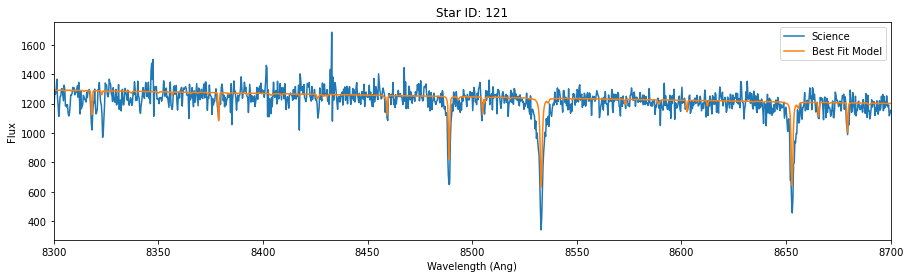

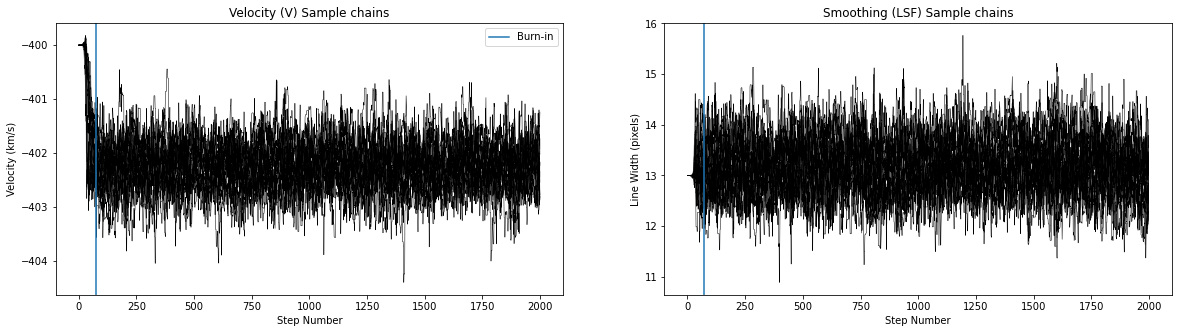

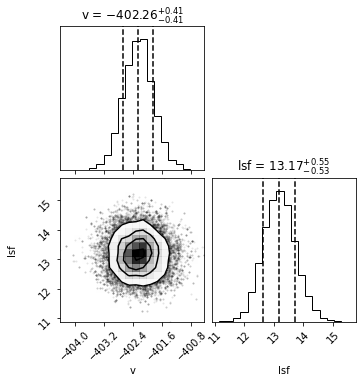

In [137]:
i=0
run_mcmc(star_ids[i], v_guess[i], lsf_guess[i], hdu, max_n = 2000)

Number of burnin samples:  105
Did chains converge [0/1:]?  0
Best velocity: -405.34 +/- 0.07 km/s


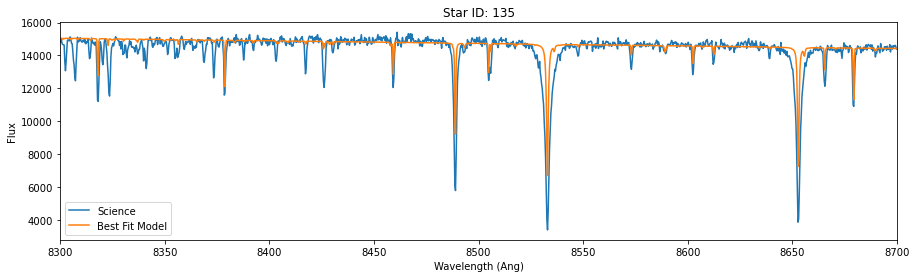

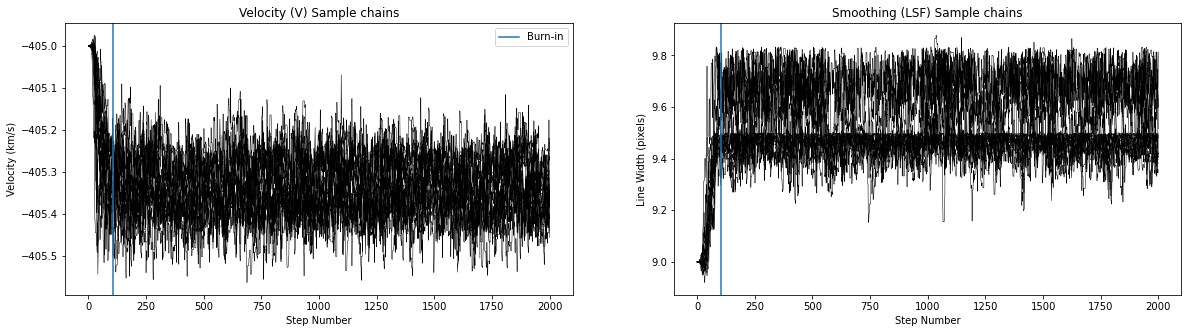

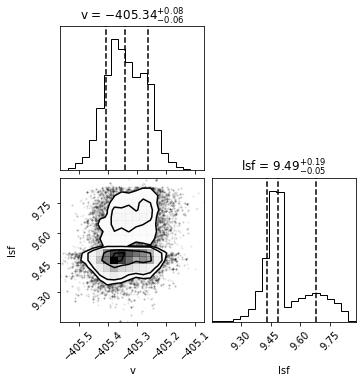

In [138]:
i = 1
run_mcmc(star_ids[i], v_guess[i], lsf_guess[i], hdu, max_n = 2000)

Thee MCMC results for Star 2 don't look very good.   This seems to be very sensitive to input values.   Many of you were able to get better looking results!

Number of burnin samples:  72
Did chains converge [0/1:]?  0
Best velocity: -49.90 +/- 0.29 km/s


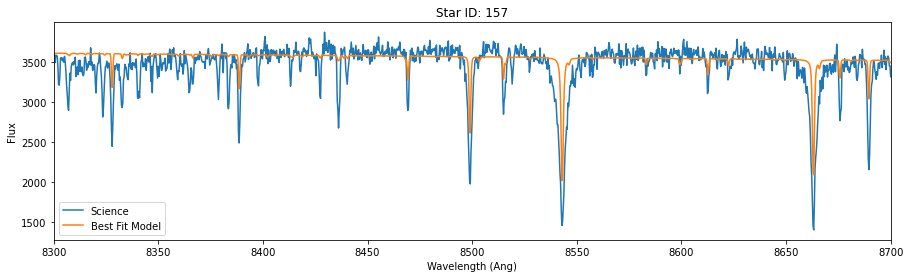

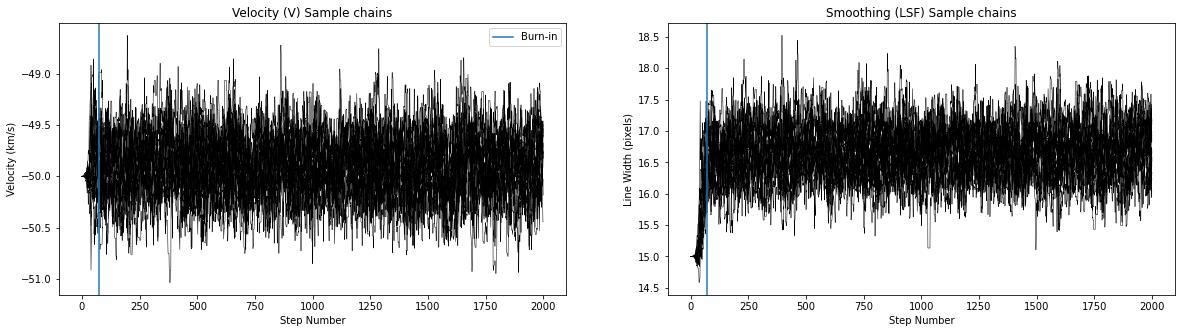

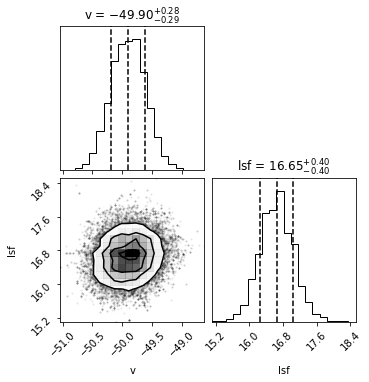

In [139]:
i = 2
run_mcmc(star_ids[i], v_guess[i], lsf_guess[i], hdu, max_n = 2000)

```{note}
In the context of MCMC, you'll often hear people talk about "marginalization". This is a classic example. Marginalization is the process of fitting for parameters we care about, plus "nuisance parameters" that we don't (like the smoothing and continuum values), and then "marginalizing out" the nuisance parameters by taking the 1D posterior spread only of the parameter of interest.
```

### Question 9:  MCMC convergence

Confirm that your MCMC above converged and that you are discarding the appropriate number of samples when determining your parameters (that is the burnin number).

> With 2000 samples, my code did not formally converge yet still provides reliable best fit values.  However, the error on these values are less well determined.   If I were to publish this work, I would run more samples to ensure the errors are correct.

### Question 10:  Science

And finally, some science questions:
1.  Do velocities agree between chi2 and mcmc within error?
    > The velocities agree very well between these methods.
    
2.  Are the velocity errors the same?
    > The errors for chi2 tend to be smaller.

3.  Are these three stars part of NGC 7006?
     > The velocity of NGC 7006 is -384 km/s.  Star 1 and 2 are definitely members of NGC 7006.  Star 3 is a foreground star, mostly likely associated with the Milky Way's disk.


### Bonus: Organizing the spectra/reduction above using OOP

Here's two classes that do everything above fairly neatly, with an example of their use.

In [ ]:
class Spectrum():
    def __init__(self,file,extension,wl_min=8300,wl_max=8800):
        self.ext = extension
        self.wl_min = wl_min
        self.wl_max = wl_max
        self.wave,self.flux,self.unc = self.load_and_truncate(self.ext,wl_min=wl_min,wl_max=wl_max)
        
    def load_and_truncate(self,extension,wl_min,wl_max):
        with fits.open(file) as hdu:
            h = hdu[extension].header
            d = hdu[extension].data
        m, = np.where((d['OPT_WAVE']>wl_min)&(d['OPT_WAVE']<wl_max))
        flux = d['OPT_COUNTS'][m]
        wave = d['OPT_WAVE'][m]
        unc = d['OPT_COUNTS_IVAR'][m]
        unc = np.sqrt(1./unc)
        return wave,flux,unc
    
    def plot(self,other=None):
        fig, ax = plt.subplots(figsize=(40,5))
        ax.fill_between(self.wave,self.flux-self.unc,self.flux+self.unc,color='gray',alpha=0.2)
        ax.plot(self.wave,self.flux,color='k')
        if other != None:
            if hasattr(other,'wave'):
                ax.plot(other.wave,other.flux,color='C1')
            else:
                #assume tuple x,y
                ax.plot(other[0],other[1],color='C1')
        ax.set_xlim(self.wl_min,self.wl_max)
        ax.set_xticks(np.arange(self.wl_min,self.wl_max,25))
        ax.tick_params(direction='in',top=True,right=True,length=10,labelsize=14)
        ax.set_ylabel('Flux',fontsize=15)
        ax.set_xlabel('wavelength',fontsize=15)
        return fig, ax
    def chi_squared(self,flux):
        chi2 = 0.5*np.sum((self.flux - flux)**2/self.unc**2)
        red_chi2 = chi2 / (len(self.flux)+2)
        return chi2, red_chi2
    
class FitSynthetic():
    def __init__(self,fname):
        with fits.open(fname) as hdu:
            data     = hdu[1].data
        self.flux = np.array(data['flux']).flatten()
        awave = np.exp((data['wave']).flatten())
        # CONVERTING AIR WAVELENGTHS TO VACUUM
        s = 10**4 / awave
        n = 1. + 0.00008336624212083 + \
                (0.02408926869968 / (130.1065924522 - s**2)) +\
                (0.0001599740894897 / (38.92568793293 - s**2))
        self.wave  = awave*n
    def add_spectrum(self,spec):
        self.spec = spec        
        
    def match_continuum(self,plot=False):
        synth_interp = np.interp(self.spec.wave,self.wave,self.flux)
        response_fn = synth_interp / self.spec.flux
        fit_response = iterative_polyfit(self.spec.wave,response_fn,1)
        fit_vals = np.polyval(fit_response,self.wave)
        if plot:
            fig,ax=plt.subplots(figsize=(40,5))
            ax.plot(self.spec.wave,response_fn)
            ax.plot(self.wave,fit_vals)
            ax.set_xlim(8300,8800)
        self.matched_flux = self.flux / fit_vals
    
    
    def get_model(self,velocity,sigma=25):
        '''
        Shift, Smooth, and Rebin synthetic spectrum based on a velocity and kernel
        '''
        velocity*= u.km/u.s
        new_wave = ((self.wave*u.angstrom) + (self.wave*u.angstrom)*(velocity/astro_c.c)).to(u.angstrom).value
        smoothspec = gaussian_filter1d(self.matched_flux,sigma)
        m, = np.where((new_wave>self.spec.wl_min)&(new_wave<self.spec.wl_max))
        swave = new_wave[m]
        sflux = smoothspec[m]
        rebinned = np.interp(self.spec.wave,swave,sflux)
        
        return self.spec.wave, rebinned
        
    def plot(self,wl_min,wl_max,which='raw',other=None):
        fig, ax = plt.subplots(figsize=(40,5))
        if which=='raw':
            ax.plot(self.wave,self.flux,color='k')
        elif which=='matched':
            if hasattr(self,'matched_flux'):
                ax.plot(self.wave,self.matched_flux,color='k')
            else:
                raise AttributeError('matched flux not found, try running match_continuum method.')
                
        if other != None:
            ax.plot(other.wave,other.flux,color='C1')
        ax.set_xlim(wl_min,wl_max)
        ax.set_xticks(np.arange(wl_min,wl_max,25))
        ax.tick_params(direction='in',top=True,right=True,length=10,labelsize=14)
        ax.set_ylabel('Flux',fontsize=15)
        ax.set_xlabel('wavelength',fontsize=15)
        return fig, ax

Here's the use case. I set things up such that the `FitSynthetic` class gets fed a `Spectrum` object and works with it:

In [ ]:
star_example = Spectrum(file,121) #initialize spectrum object for one of the stars 

fit = FitSynthetic(template_file) #initialize fit synthetic with a file
fit.add_spectrum(star_example) # add the star spec
fit.match_continuum() # match the continuum 

# I can now ask for a model with any velocity or smmoothing

x,y = fit.get_model(-400,15)

# And my Spectrum class has a handy chi2 function to compare itself to any input model 

star_example.chi_squared(y)

The above means the all the code you need to write to fit a velocity by minimizing chi2 looks like this:

In [ ]:
def min_chi2(spectrum,template_file,v_grid):
    fit = FitSynthetic(template_file)
    fit.add_spectrum(spectrum)
    fit.match_continuum()
    store = []
    for v in v_grid():
        x,y = fit.get_model(v,15)
        c2,c2r = spectrum.chi_squared(y)
        store.append(c2r)
    minc2 = np.argmin(store)
    return v_grid[minc2]

Finally, each state of each class has handy `plot` methods to plot up what's being stored.